In [5]:
# Imports
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import lightgbm as lgb

,country,year,GDP_constant_USD,Tourism_receipts_USD,Tourism_arrivals,Population,Unemployment_rate_pct,Gross_fixed_capital_formation_pctGDP,Trade_openness_pctGDP,Inflation_pct,Exchange_rate_local_to_USD,Air_transport_passengers,GDP_growth,Tourism_growth
4,Albania,2019,1.302501e+10,2.458000e+09,6406000.0,2854191,11.466,25.287526,75.382129,1.411091,109.850833,307741.0,0.034273,0.977474
5,Albania,2018,1.276179e+10,2.306000e+09,5927000.0,2866376,12.304,27.125299,75.694078,2.028060,107.989167,303137.0,-0.020209,-0.061839
6,Albania,2017,1.230984e+10,2.050000e+09,5118000.0,2873457,13.616,27.657593,76.787382,1.986661,119.100000,204090.0,-0.035414,-0.111015
7,Albania,2016,1.191853e+10,1.821000e+09,4736000.0,2876101,15.418,26.814346,74.014450,1.275432,124.142500,26634.0,-0.031788,-0.111707
9,Albania,2014,1.122022e+10,1.849000e+09,3673000.0,2889104,18.055,28.304782,75.021202,1.625865,105.480000,151632.0,-0.021792,0.146311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Sweden,2004,4.057326e+11,7.686000e+09,4676000.0,8993531,6.693,21.162499,78.735520,0.373660,7.348887,11623925.0,-0.027173,0.007604
788,Sweden,2003,3.894552e+11,6.548000e+09,4268000.0,8958229,5.555,21.245581,75.327818,1.925655,8.086304,11586025.0,-0.040119,-0.148061
789,Sweden,2002,3.822650e+11,5.671000e+09,4276000.0,8924958,4.965,21.604369,77.084904,2.158482,9.737123,12421220.0,-0.018462,-0.133934
790,Sweden,2001,3.737522e+11,5.200000e+09,4108000.0,8895960,4.730,22.303586,80.568700,2.405958,10.329136,13123426.0,-0.022269,-0.083054


R^2 score: 0.4304
RMSE: 0.0261


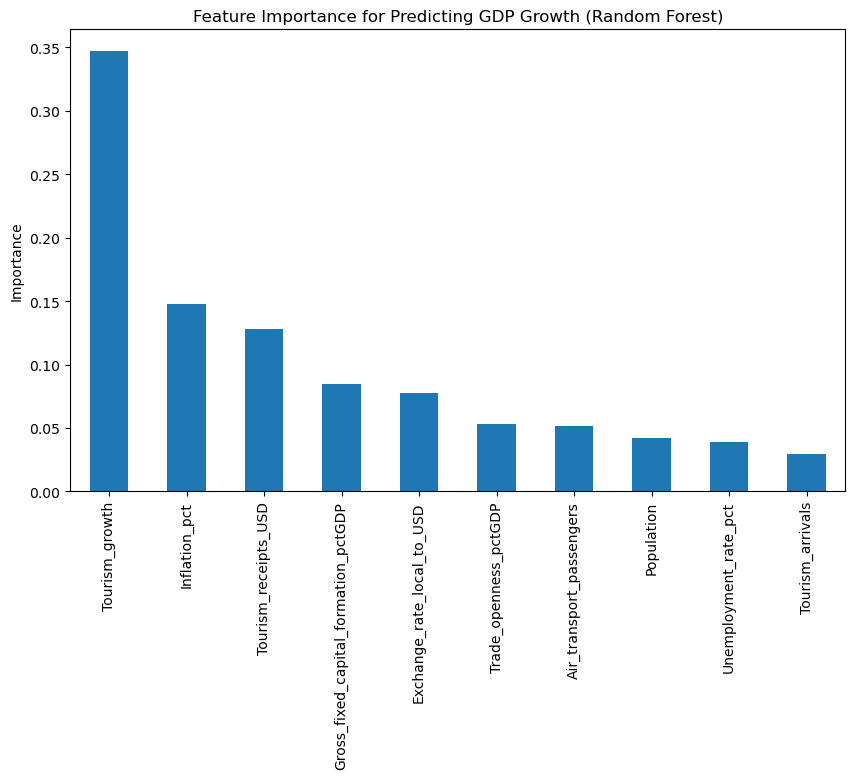


Feature Importance:


Tourism_growth                          0.346867
Inflation_pct                           0.147760
Tourism_receipts_USD                    0.127978
Gross_fixed_capital_formation_pctGDP    0.084640
Exchange_rate_local_to_USD              0.077386
Trade_openness_pctGDP                   0.053117
Air_transport_passengers                0.051596
Population                              0.042265
Unemployment_rate_pct                   0.038654
Tourism_arrivals                        0.029736
dtype: float64

In [ ]:
df = pd.read_csv("../europe_tourism_gdp.csv")

# GDP growth = (GDP_current_year - GDP_previous_year) / GDP_previous_year
# Do same for tourism growth
df['GDP_growth'] = df.groupby('country')['GDP_constant_USD'].pct_change()
df['Tourism_growth'] = df.groupby('country')['Tourism_receipts_USD'].pct_change()

features = [
	'Tourism_receipts_USD',
	'Tourism_arrivals',
	'Population',
	'Unemployment_rate_pct',
	'Gross_fixed_capital_formation_pctGDP',
	'Trade_openness_pctGDP',
	'Inflation_pct',
	'Exchange_rate_local_to_USD',
	'Air_transport_passengers',
	'Tourism_growth'
]

target = 'GDP_growth'

df = df.dropna(subset=features + [target])

display(df)

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print(f"R^2 score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.4f}")

# Get importances
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)


plt.figure(figsize=(10,6))
feat_importance.plot(kind='bar')
plt.title('Feature Importance for Predicting GDP Growth (Random Forest)')
plt.ylabel('Importance')
plt.show()

print("\nFeature Importance:")
display(feat_importance)



LightGBM Results:
R^2 score: 0.3612
RMSE: 0.0276


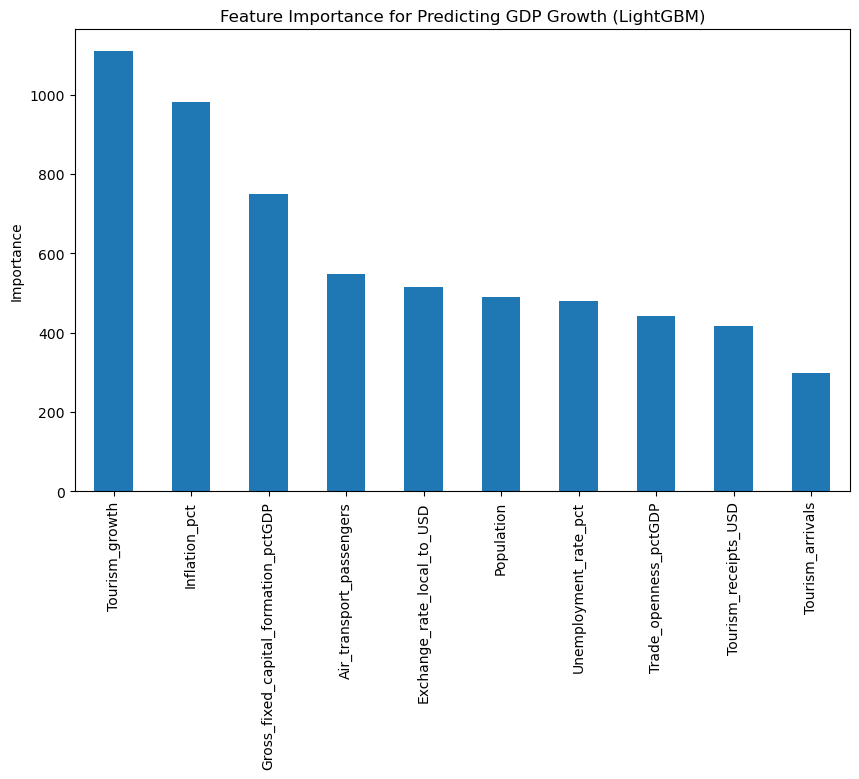


LightGBM Feature Importance:
Tourism_growth                          1109
Inflation_pct                            982
Gross_fixed_capital_formation_pctGDP     750
Air_transport_passengers                 549
Exchange_rate_local_to_USD               515
Population                               489
Unemployment_rate_pct                    481
Trade_openness_pctGDP                    442
Tourism_receipts_USD                     417
Tourism_arrivals                         299
dtype: int32

Model Comparison:


,Random Forest,LightGBM
R² Score,0.430361,0.361202
RMSE,0.026078,0.027616


In [ ]:
# LightGBM Model
lgbm = lgb.LGBMRegressor(n_estimators=500, random_state=42, verbose=-1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)
print("\nLightGBM Results:")
print(f"R^2 score: {r2_score(y_test, y_pred_lgbm):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lgbm, squared=False):.4f}")

# LGBM Feature Importance
lgbm_importance = pd.Series(lgbm.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
lgbm_importance.plot(kind='bar')
plt.title('Feature Importance for Predicting GDP Growth (LightGBM)')
plt.ylabel('Importance')
plt.show()

print("\nLightGBM Feature Importance:")
print(lgbm_importance)

# Create df for model comparisons
comparison = pd.DataFrame({
    'Random Forest': [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False)],
    'LightGBM': [r2_score(y_test, y_pred_lgbm), mean_squared_error(y_test, y_pred_lgbm, squared=False)]
}, index=['R² Score', 'RMSE'])

print("Model Comparison:")
display(comparison)

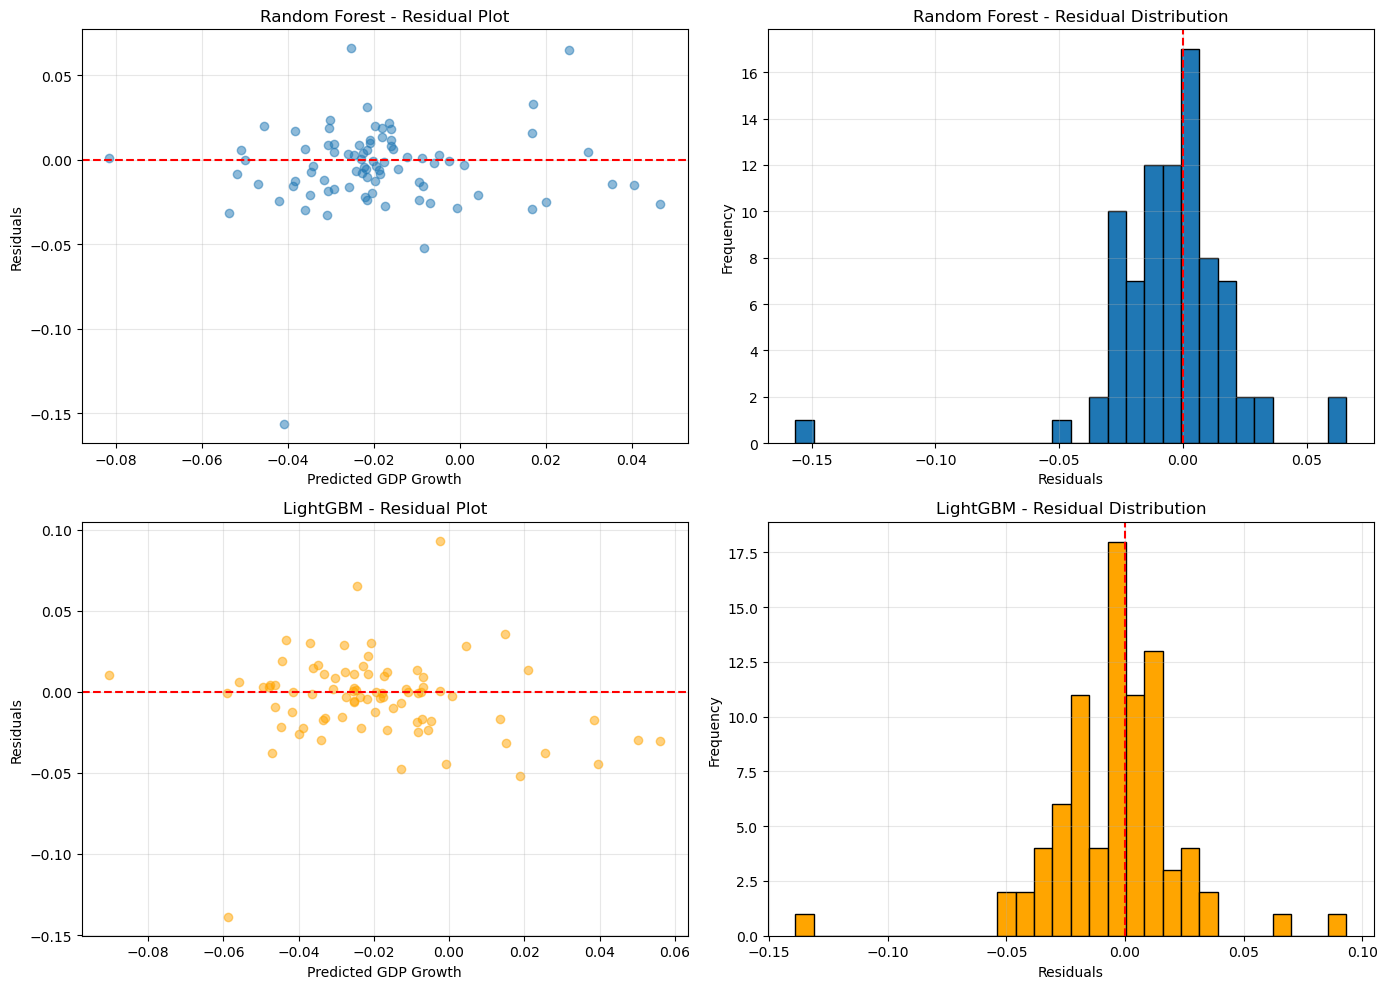


Residual Analysis:

Random Forest:
  Mean Residual: -0.004578
  Std Residual: 0.025829

LightGBM:
  Mean Residual: -0.004009
  Std Residual: 0.027489


In [ ]:
# Residual Plots for RF and LightGBM
residuals_rf = y_test - y_pred
residuals_lgbm = y_test - y_pred_lgbm

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Random Forest - Residual Plot
axes[0, 0].scatter(y_pred, residuals_rf, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Predicted GDP Growth')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Random Forest - Residual Plot')
axes[0, 0].grid(True, alpha=0.3)

# Random Forest - Residual Distribution
axes[0, 1].hist(residuals_rf, bins=30, edgecolor='black')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Random Forest - Residual Distribution')
axes[0, 1].axvline(x=0, color='r', linestyle='--')
axes[0, 1].grid(True, alpha=0.3)

# LightGBM - Residual Plot
axes[1, 0].scatter(y_pred_lgbm, residuals_lgbm, alpha=0.5, color='orange')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted GDP Growth')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('LightGBM - Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# LightGBM - Residual Distribution
axes[1, 1].hist(residuals_lgbm, bins=30, edgecolor='black', color='orange')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('LightGBM - Residual Distribution')
axes[1, 1].axvline(x=0, color='r', linestyle='--')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual Statistics
print(f"\nRandom Forest:")
print(f"  Mean Residual: {residuals_rf.mean():.6f}")
print(f"  Std Residual: {residuals_rf.std():.6f}")

print(f"\nLightGBM:")
print(f"  Mean Residual: {residuals_lgbm.mean():.6f}")
print(f"  Std Residual: {residuals_lgbm.std():.6f}")

c:\Users\matec\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\matec\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\matec\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\matec\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\matec\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn


=== Per-country Tourism sensitivity (TS-CV R²) ===


,RF_Tourism_importance,XGB_Tourism_importance,RF_R2_CV,XGB_R2_CV
Romania,0.567181,0.516217,-3.628882,-6.548152
Poland,0.429292,0.445520,0.048493,-1.365627
Czechia,0.395921,0.501059,-2.120596,-2.304354
Croatia,0.367975,0.617979,-41.596330,-42.762261
Slovenia,0.348902,0.321265,-8.253191,-4.237902
France,0.347872,0.749936,-6.078202,-6.994491
Portugal,0.344765,0.329534,-1.260333,-0.623115
Italy,0.337208,0.421750,-8.177596,-1.976217
Hungary,0.330837,0.491319,-32.798613,-47.169527
Slovak Republic,0.312918,0.129853,-0.578756,-0.793340


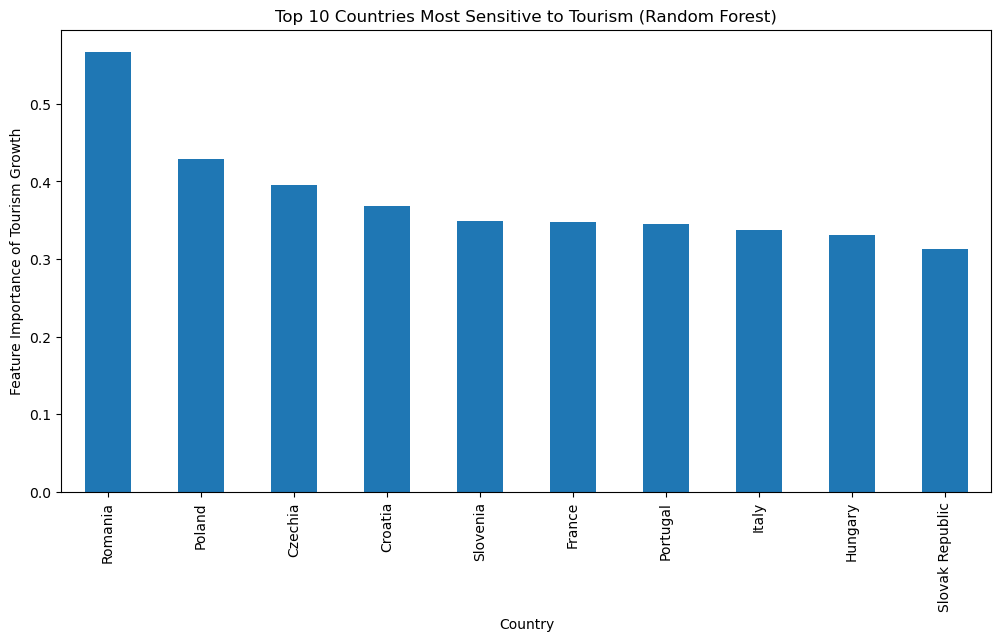


=== Per-country Tourism sensitivity (ordered by XGBoost) ===


,RF_Tourism_importance,XGB_Tourism_importance,RF_R2_CV,XGB_R2_CV
France,0.347872,0.749936,-6.078202,-6.994491
Croatia,0.367975,0.617979,-41.596330,-42.762261
Albania,0.230081,0.568477,NaN,NaN
Romania,0.567181,0.516217,-3.628882,-6.548152
Czechia,0.395921,0.501059,-2.120596,-2.304354
Hungary,0.330837,0.491319,-32.798613,-47.169527
Poland,0.429292,0.445520,0.048493,-1.365627
Italy,0.337208,0.421750,-8.177596,-1.976217
Switzerland,0.310134,0.413840,-1.529744,-2.160060
Serbia,0.148943,0.390289,-3.165986,-3.440561


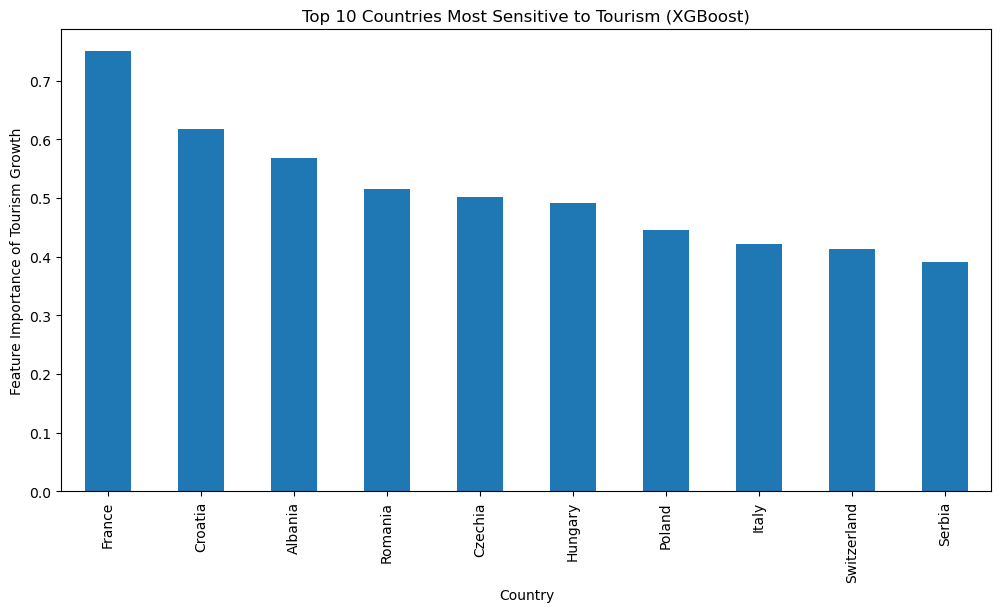

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../europe_tourism_gdp.csv")

# create our two new features
df['GDP_growth'] = df.groupby('country')['GDP_constant_USD'].pct_change()
df['Tourism_growth'] = df.groupby('country')['Tourism_receipts_USD'].pct_change()

# Select features and target
features = [
    'Tourism_growth',
    'Population',
    'Unemployment_rate_pct',
    'Gross_fixed_capital_formation_pctGDP',
    'Trade_openness_pctGDP',
    'Inflation_pct',
    'Exchange_rate_local_to_USD',
    'Air_transport_passengers'
]
target = 'GDP_growth'

# Create dictionary for models results by country
rf_sensitivity = {}
xgb_sensitivity = {}
r2_scores_rf = {}
r2_scores_xgb = {}

# Time series cross val setup
tscv = TimeSeriesSplit(n_splits=5)  

# Create models for each country
for country in df['country'].unique():
    df_country = df[df['country'] == country].dropna(subset=features + [target])
    
    if len(df_country) < 10:
        # Not enough data for 5 splits
        continue
    
    X = df_country[features]
    y = df_country[target]

    # Train random forest and append cross val results
    rf = RandomForestRegressor(
        n_estimators=50,
        max_depth=4,
        random_state=42
    )
    rf_scores = []
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        rf.fit(X_train, y_train)
        preds = rf.predict(X_test)
        rf_scores.append(r2_score(y_test, preds))
    r2_scores_rf[country] = np.mean(rf_scores)
    rf_sensitivity[country] = rf.feature_importances_[0]

    # Train XGBoost and evaluate for each cross val split
    xgbr = xgb.XGBRegressor(
        n_estimators=50,
        max_depth=3,
        learning_rate=0.05,
        random_state=42,
        objective="reg:squarederror"
    )
    xgb_scores = []
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        xgbr.fit(X_train, y_train)
        preds = xgbr.predict(X_test)
        xgb_scores.append(r2_score(y_test, preds))

    r2_scores_xgb[country] = np.mean(xgb_scores)
    xgb_sensitivity[country] = xgbr.feature_importances_[0]

# Store results for display
sensitivity_df = pd.DataFrame({
    'RF_Tourism_importance': pd.Series(rf_sensitivity),
    'XGB_Tourism_importance': pd.Series(xgb_sensitivity),
    'RF_R2_CV': pd.Series(r2_scores_rf),
    'XGB_R2_CV': pd.Series(r2_scores_xgb)
}).sort_values(by='RF_Tourism_importance', ascending=False)

print("\nPer-country Tourism sensitivity (TS-CV R^2)")
display(sensitivity_df)

# Plot RF importances
plt.figure(figsize=(12,6))
sensitivity_df['RF_Tourism_importance'].head(10).plot(kind='bar')
plt.title('Top 10 Countries Most Sensitive to Tourism (Random Forest)')
plt.ylabel('Feature Importance of Tourism Growth')
plt.xlabel('Country')
plt.show()

# Plot XGBoost importances
sensitivity_df_xgb = sensitivity_df.sort_values(by='XGB_Tourism_importance', ascending=False)
print("\nPer-country Tourism sensitivity (ordered by XGBoost)")
display(sensitivity_df_xgb)

plt.figure(figsize=(12,6))
sensitivity_df_xgb['XGB_Tourism_importance'].head(10).plot(kind='bar')
plt.title('Top 10 Countries Most Sensitive to Tourism (XGBoost)')
plt.ylabel('Feature Importance of Tourism Growth')
plt.xlabel('Country')
plt.show()
